# Infopillar Solution

# Name- Pratibha Rakhama Antre

# Task 4- Housing Prices Prediction Project

# Project idea – The dataset has house prices of the Boston residual areas.The expense of the house varies according to various factors like crime rate, number of rooms, etc. It is a good ML project for beginners to predict prices on the basis of new data.

# Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

# Load the dataset

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

# Clean & preprocess the dataset

In [3]:
df= pd.DataFrame(boston.data)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
df.columns=boston.feature_names

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [8]:
df.shape

(506, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [10]:
df.isnull().sum().sum()

0

# Set the target

In [11]:
df['price']=boston.target

# To divide the dataset

In [12]:
X = df.drop(['price'], axis = 1)
y = df['price']

# To divide the dataset into train & test

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


# To build the model

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
reg = RandomForestRegressor()
reg.fit(X_train, y_train)

RandomForestRegressor()

In [16]:
y_pred = reg.predict(X_train)

# To evaluate the model

In [17]:
print("Mean Absolute Error    =",mean_absolute_error(y_pred,y_train))
print("Mean Squared Error     =",mean_squared_error(y_train,y_pred))
print("Root Mean Squared Error=",np.sqrt(mean_squared_error(y_train,y_pred)))
print("R2 score               =",r2_score(y_train,y_pred))

Mean Absolute Error    = 0.826561881188118
Mean Squared Error     = 1.6609526410891091
Root Mean Squared Error= 1.2887795160884228
R2 score               = 0.9803410474834515


# Conclusion- We have built the House prediction model gives us 98% Accuracy

# Data visualization

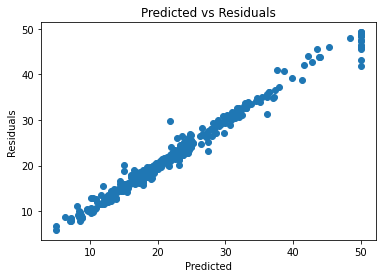

In [18]:
plt.scatter(y_train,y_pred)
plt.title("Predicted vs Residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

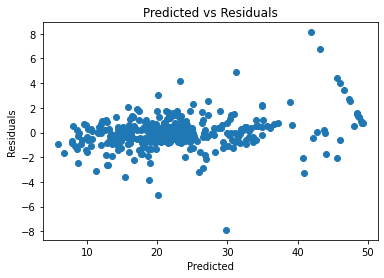

In [19]:
plt.scatter(y_pred, y_train - y_pred)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title("Predicted vs Residuals")
plt.show()